<a href="https://colab.research.google.com/github/ushasree-s/FML/blob/main/Univariate_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from plotly.offline import iplot

In [2]:
data = pd.read_csv('Company_data.csv')
print(data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [3]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
data.shape

(200, 4)

In [10]:
data.describe().loc['mean']

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         15.1305
Name: mean, dtype: float64

<Axes: >

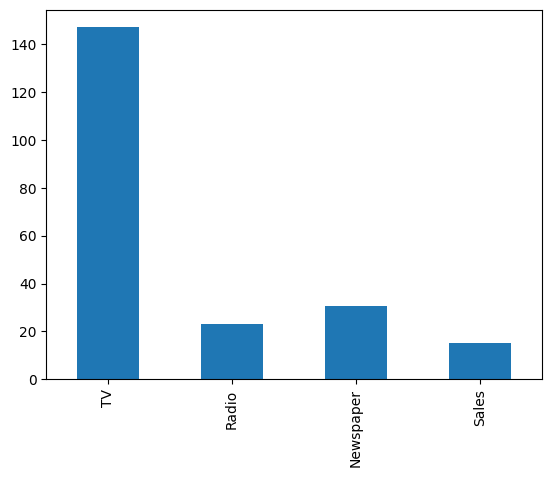

In [11]:
data.describe().loc['mean'].plot.bar()

<ipython-input-12-5bd3f3cbc0d2>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




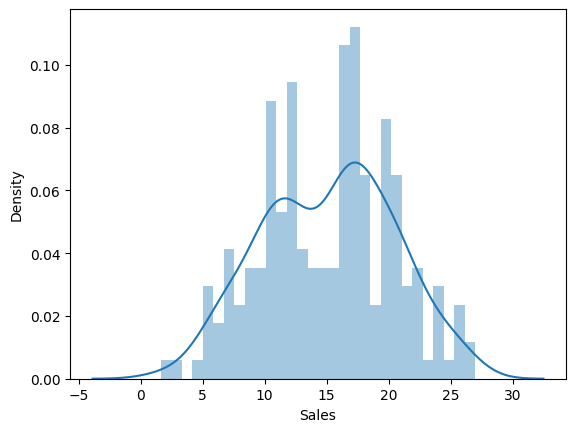

In [12]:
sns.distplot(data['Sales'],bins=30)
plt.show()

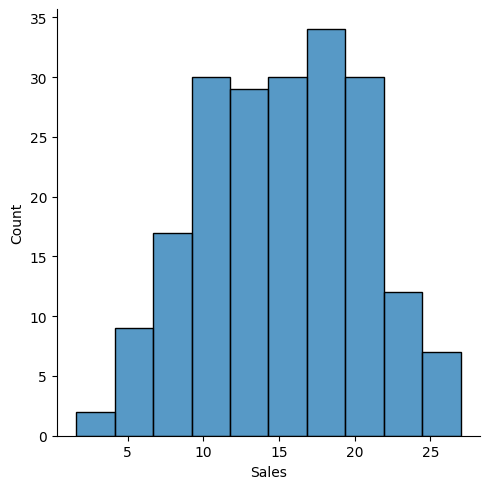

In [13]:
sns.displot(data['Sales'],bins=10)
plt.show()

In [15]:
d = data.corr()

In [16]:
d.shape

(4, 4)

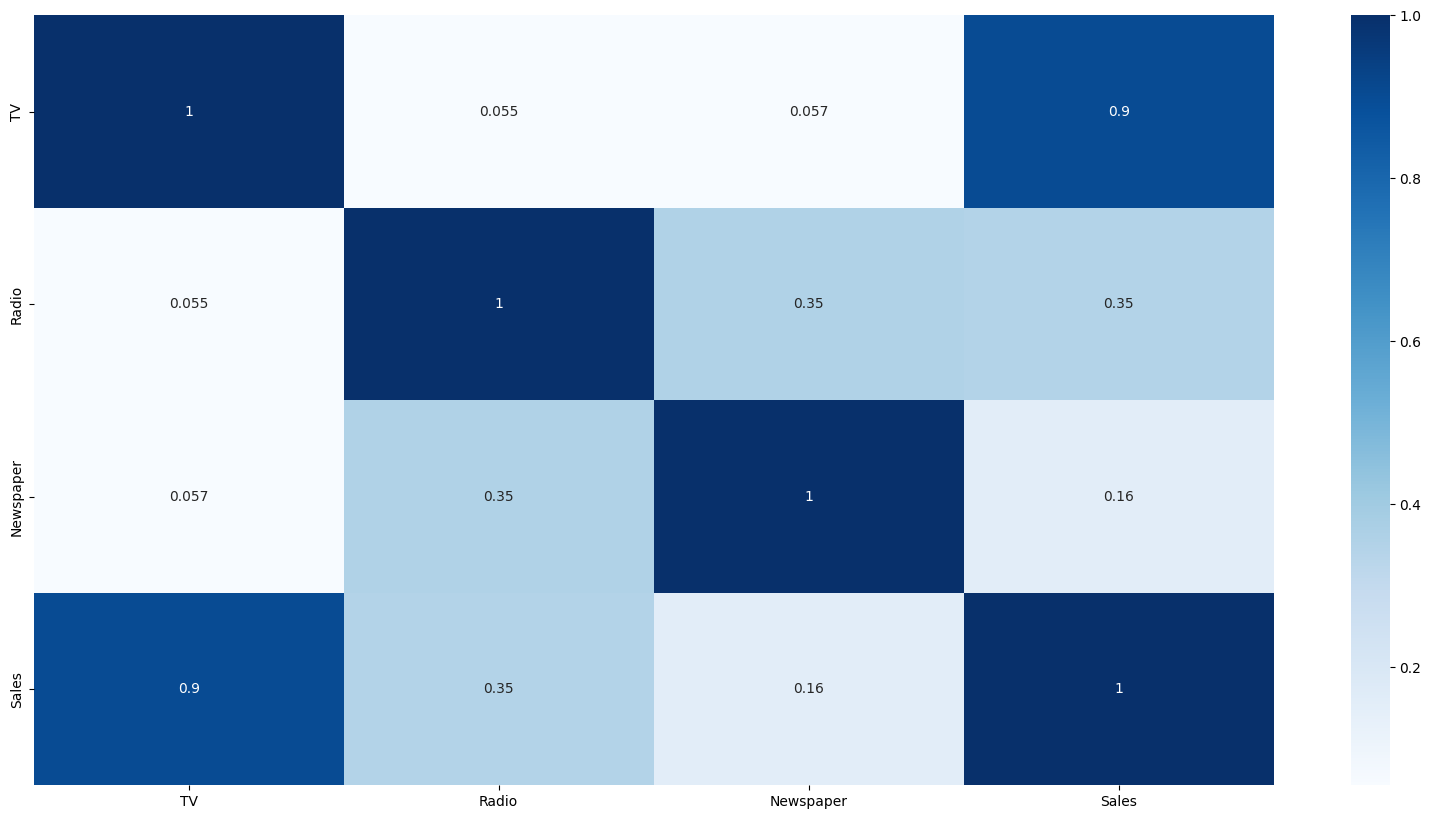

In [17]:
plt.figure(figsize=(20, 10))
sns.heatmap(d, annot=True,cmap='Blues')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)


In [19]:
X_train.shape, X_test.shape

((140, 3), (60, 3))

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

In [21]:
X = data.drop('Sales', axis=1).values
Y = data['Sales'].values


In [22]:
x_np = data['Newspaper'].values
print(x_np)

[ 69.2  45.1  69.3  58.5  58.4  75.   23.5  11.6   1.   21.2  24.2   4.
  65.9   7.2  46.   52.9 114.   55.8  18.3  19.1  53.4  23.5  49.6  26.2
  18.3  19.5  12.6  22.9  22.9  40.8  43.2  38.6  30.    0.3   7.4   8.5
   5.   45.7  35.1  32.   31.6  38.7   1.8  26.4  43.3  31.5  35.7  18.5
  49.9  36.8  34.6   3.6  39.6  58.7  15.9  60.   41.4  16.6  37.7   9.3
  21.4  54.7  27.3   8.4  28.9   0.9   2.2  10.2  11.   27.2  38.7  31.7
  19.3  31.3  13.1  89.4  20.7  14.2   9.4  23.1  22.3  36.9  32.5  35.6
  33.8  65.7  16.   63.2  73.4  51.4   9.3  33.   59.   72.3  10.9  52.9
   5.9  22.   51.2  45.9  49.8 100.9  21.4  17.9   5.3  59.   29.7  23.2
  25.6   5.5  56.5  23.2   2.4  10.7  34.5  52.7  25.6  14.8  79.2  22.3
  46.2  50.4  15.6  12.4  74.2  25.9  50.6   9.2   3.2  43.1   8.7  43.
   2.1  45.1  65.6   8.5   9.3  59.7  20.5   1.7  12.9  75.6  37.9  34.4
  38.9   9.    8.7  44.3  11.9  20.6  37.   48.7  14.2  37.7   9.5   5.7
  50.5  24.3  45.2  34.6  30.7  49.3  25.6   7.4   5.

In [23]:
x_np.shape,Y.shape

((200,), (200,))

In [24]:
type(x_np), type(Y)

(numpy.ndarray, numpy.ndarray)

In [25]:
x_np = x_np.reshape(-1,1)
y = Y.reshape(-1,1)

Text(0, 0.5, 'Sales')

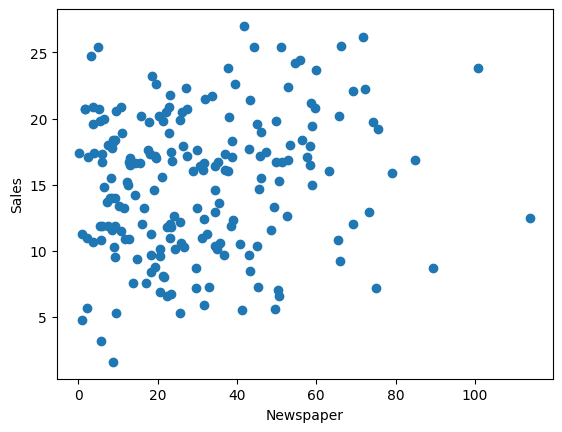

In [26]:
plt.scatter(x_np,y)
plt.xlabel('Newspaper')
plt.ylabel('Sales')

In [27]:
reg = linear_model.LinearRegression()
reg.fit(x_np,y)

LinearRegression()

In [28]:
y_pred = reg.predict(x_np)

In [29]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(x_np)

print(f'MAE = {mean_absolute_error(y, y_pred)}')
print(f'MSE = {mean_squared_error(y, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'R_2 = {r2_score(y, y_pred)}')


MAE = 4.3670510624236485
MSE = 27.086772697557045
RMSE = 5.204495431601131
R_2 = 0.024951369862864836


In [34]:
prediction_space = np.linspace(min(x_np), max(x_np)).reshape(-1,1)

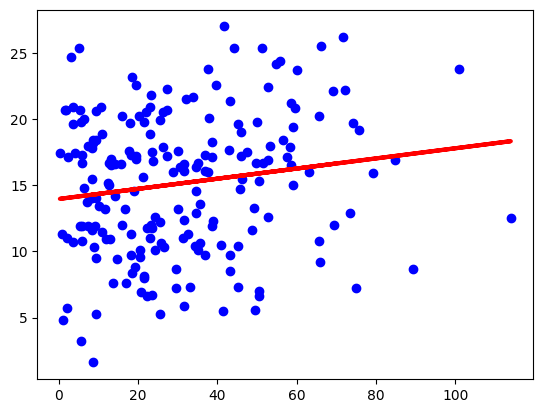

In [35]:
plt.scatter(x_np, y, color='blue')
plt.plot(x_np, reg.predict(x_np), color='red', linewidth=3)
plt.show()


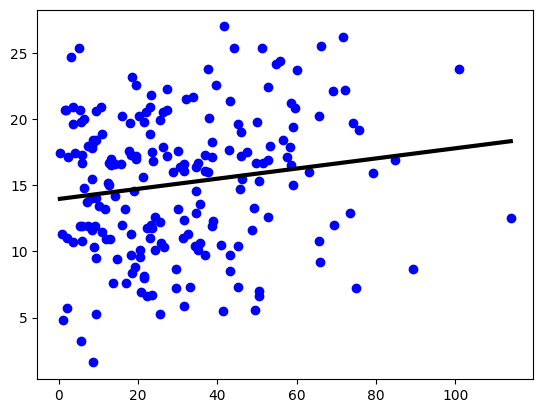

In [36]:
plt.scatter(x_np, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()
